# Modeling

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

# statistics testing
import scipy.stats as stats

# system manipulation
import itertools
import os
import sys
sys.path.append("./util_")
import prepare_
import explore_

# other
import env
import warnings
warnings.filterwarnings("ignore")

# set the random seed
np.random.seed(95)

**Get train and validate datasets**

In [2]:
# This data is already been split and save
# This is only training data
train_scaled = pd.read_csv("./00_project_data/1-1_training_data.csv", index_col=0)
validate_scaled = pd.read_csv("./00_project_data/1-2_validation_data.csv", index_col=0)

train_scaled = train_scaled.reset_index(drop=True)
validate_scaled = validate_scaled.reset_index(drop=True)
train_scaled.head()

,tax_value,county,los_angeles,orange,ventura,bedrooms_scaled,bathrooms_scaled,sqr_feet_scaled,year_built_scaled,tax_amount_scaled
0,160657.0,Los Angeles,1,0,0,0.428571,0.428571,0.320064,0.405172,0.162429
1,243277.0,Orange,0,1,0,0.428571,0.142857,0.195839,0.448276,0.144717
2,285312.0,Los Angeles,1,0,0,0.428571,0.428571,0.411882,0.491379,0.174333
3,268523.0,Ventura,0,0,1,0.428571,0.285714,0.261252,0.706897,0.147458
4,339115.0,Los Angeles,1,0,0,0.428571,0.285714,0.382877,0.655172,0.217292


**Set baseline**

In [3]:
# set baseline at the mean and median of the target
baseline_mean = train_scaled.tax_value.mean()
baseline_median = train_scaled.tax_value.median()

print(f"mean basline: {baseline_mean}\
\nmedian baseline: {baseline_median}")

mean basline: 386859.1336478978
median baseline: 319524.0


**Separate Feature and target**

In [4]:
# separate features from target
# these coluns are set in order of importance
xtrain = train_scaled[['los_angeles', 'ventura', 'orange', 
                       'bathrooms_scaled','sqr_feet_scaled', 
                       'bedrooms_scaled', 'year_built_scaled']]

ytrain= train_scaled.tax_value

### ----------------------------------------------------------------

# separate features from target
# these coluns are set in order of importance
xval = validate_scaled[['los_angeles', 'ventura', 'orange', 
                       'bathrooms_scaled','sqr_feet_scaled', 
                       'bedrooms_scaled', 'year_built_scaled']]

yval= validate_scaled.tax_value


## Linear Regression (OLS)

**Train**

In [5]:
# MAKE THE THING: create the model object
linear_model_ols = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = linear_model_ols.fit(xtrain, ytrain)

#2. USE THE THING: make a prediction
ytrain_pred_ols = linear_model_ols.predict(xtrain)

#3. Evaluate: RMSE
rmse_train_ols = mean_squared_error(ytrain, ytrain_pred_ols) ** (.5) # 0.5 to get the root


**Validate**

In [6]:

#2. USE THE THING: make a prediction
yval_pred_ols = linear_model_ols.predict(xval)

#3. Evaluate: RMSE
rmse_val_ols = mean_squared_error(yval, yval_pred_ols) ** (.5) # 0.5 to get the root


# root mean squeared error
print(f"OLS Regressor \nRMSE_train {rmse_train_ols} \
\nRMSE_validate {rmse_val_ols} \
\nRMSE_difference {rmse_val_ols - rmse_train_ols} \
\nR2_validate {explained_variance_score(yval, yval_pred_ols)}")

OLS Regressor 
RMSE_train 235399.3111268613 
RMSE_validate 235138.62240255778 
RMSE_difference -260.68872430353076 
R2_validate 0.33324587671290495


## LassoLars

**train**

In [7]:
# MAKE THE THING: create the model object
linear_nodel_lars = LassoLars(alpha= 1.0)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
laslars = linear_nodel_lars.fit(xtrain, ytrain)

#2. USE THE THING: make a prediction
ytrain_pred_lars = linear_nodel_lars.predict(xtrain)

#3. Evaluate: RMSE
rmse_train_lars = mean_squared_error(ytrain, ytrain_pred_lars) ** (0.5)


**Validate**

In [8]:

# predict validate
yval_pred_lars = linear_nodel_lars.predict(xval)

# evaluate: RMSE
rmse_val_lars = mean_squared_error(yval, yval_pred_lars) ** (0.5)

# how important is each feature to the target
laslars.coef_

print(f"""RMSE for Lasso + Lars
_____________________
RMSE Training/In-Sample: {rmse_train_lars}, 
RMSE Validation/Out-of-Sample:  {rmse_val_lars}
RMSE Difference:  {rmse_val_lars - rmse_train_lars}
R2_validate {explained_variance_score(yval, yval_pred_lars)}")
""")

RMSE for Lasso + Lars
_____________________
RMSE Training/In-Sample: 235399.22164856692, 
RMSE Validation/Out-of-Sample:  235138.925931316
RMSE Difference:  -260.2957172509341
R2_validate 0.33324415534173624")



## TweedieRegressor (GLM:Generalized Linear Model)

<Axes: >

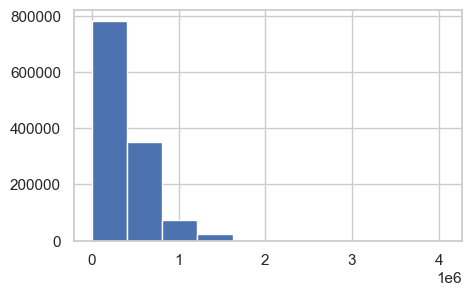

In [11]:
# Plot the distribution
plt.figure(figsize=(5,3))
ytrain.hist()

# looks like a poisson distribution

**Train**

In [12]:
# MAKE THE THING: create the model object
linear_nodel_twd = TweedieRegressor(alpha= 1.0, power= 1)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
tweedieReg = linear_nodel_twd.fit(xtrain, ytrain)

#2. USE THE THING: make a prediction
ytrain_pred_twd = linear_nodel_twd.predict(xtrain)

#3. Evaluate: RMSE
rmse_train_twd = mean_squared_error(ytrain, ytrain_pred_twd) ** (0.5)


**Validate**

In [13]:
# predict validate
yval_pred_twd = linear_nodel_twd.predict(xval)

# evaluate: RMSE
rmse_val_twd = mean_squared_error(yval, yval_pred_twd) ** (0.5)

# how important is each feature to the target
tweedieReg.coef_

print(f"""RMSE for Lasso + Lars
_____________________
RMSE Training/In-Sample: {rmse_train_twd}, 
RMSE Validation/Out-of-Sample:  {rmse_val_twd}
RMSE Difference:  {rmse_val_twd - rmse_train_twd}
R2_validate {explained_variance_score(yval, yval_pred_twd)}")
""")

RMSE for Lasso + Lars
_____________________
RMSE Training/In-Sample: 236386.03523479012, 
RMSE Validation/Out-of-Sample:  236127.92329975966
RMSE Difference:  -258.11193503046525
R2_validate 0.32762366310882374")



## Polynomial Features

**Prep Polynomial features**

In [17]:
#1. Create the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared

#1. Fit and transform X_train_scaled
xtrain_degree2 = pf.fit_transform(xtrain)

#1. Transform X_validate_scaled & X_test_scaled 
xval_degree2 = pf.transform(xval)

xtrain_degree2[1]
# x_test_degree2 = pf.transform(x_test_scaled)

array([1.        , 0.        , 0.        , 1.        , 0.14285714,
       0.19583917, 0.42857143, 0.44827586, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.14285714, 0.19583917, 0.42857143,
       0.44827586, 0.02040816, 0.02797702, 0.06122449, 0.06403941,
       0.03835298, 0.08393107, 0.08778997, 0.18367347, 0.19211823,
       0.20095125])

**Train**

In [18]:
#2.1 MAKE THE THING: create the model object
linear_model_pf = LinearRegression()

#2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
polyFeat = linear_model_pf.fit(xtrain_degree2, ytrain)

#3. USE THE THING: predict train
ytrain_pred_poly = linear_model_pf.predict(xtrain_degree2)

#4. Evaluate: rmse
rmse_train_poly = mean_squared_error(ytrain, ytrain_pred_poly) ** (0.5)


**Validate**

In [19]:
# predict validate
yval_pred_poly = linear_model_pf.predict(xval_degree2)

# evaluate: RMSE
rmse_val_poly = mean_squared_error(yval, yval_pred_poly) ** (0.5)

# how important is each feature to the target
polyFeat.coef_


print(f"""RMSE for Lasso + Lars
_____________________
RMSE Training/In-Sample: {rmse_train_poly}, 
RMSE Validation/Out-of-Sample:  {rmse_val_poly}
RMSE Difference:  {rmse_val_poly - rmse_train_poly}
R2_validate {explained_variance_score(yval, yval_pred_poly)}")
""")

RMSE for Lasso + Lars
_____________________
RMSE Training/In-Sample: 231932.55070173478, 
RMSE Validation/Out-of-Sample:  231637.56517182206
RMSE Difference:  -294.985529912723
R2_validate 0.35295335681046747")



## Best Model Test

In [ ]:
# # predict validate
# ytest_pred_twd = linear_nodel_twd.predict(xval)

# # evaluate: RMSE
# rmse_test_twd = mean_squared_error(yval, ytest_pred_twd) ** (0.5)

# # how important is each feature to the target
# tweedieReg.coef_

# print(f"""RMSE for Lasso + Lars
# _____________________
# RMSE Train: {rmse_train_twd}
# RMSE Test: {rmse_test_twd}
# RMSE Difference (test vs train):  {rmse_test_twd - rmse_train_twd}

# Baseline mean: {baseline_mean}
# Baseline median: {baseline_median}
# """)

# # R2_validate {explained_variance_score(yval, yval_pred_twd)}"